# Import Libraries 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import pandas as pd

#  A single Demo Plot

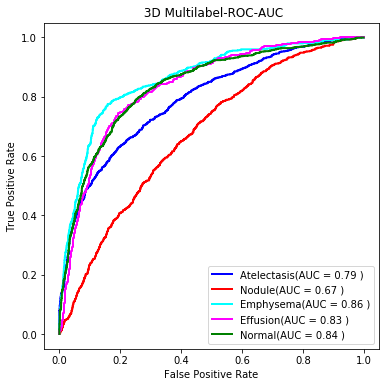

In [117]:
Training_csv=pd.read_csv("D:/Science/WinSCP/predict_BCL_tara_epoch_20_without_rglz.csv")

###----(Getting--lbls)---------##
y_true_class0=Training_csv['lbl0']
y_true_class1=Training_csv['lbl1']
y_true_class2=Training_csv['lbl2']
y_true_class3=Training_csv['lbl3']
y_true_class4=Training_csv['lbl4']
####----(Getting Predictions)---##
y_pred_class0=Training_csv['pred0']
y_pred_class1=Training_csv['pred1']
y_pred_class2=Training_csv['pred2']
y_pred_class3=Training_csv['pred3']
y_pred_class4=Training_csv['pred4']



###----getting TPR and FPR
fpr_cls0,tpr_cl0,_=roc_curve(y_true_class0, y_pred_class0,pos_label=1)
fpr_cls1,tpr_cl1,_=roc_curve(y_true_class1, y_pred_class1,pos_label=1)
fpr_cls2,tpr_cl2,_=roc_curve(y_true_class2, y_pred_class2,pos_label=1)
fpr_cls3,tpr_cl3,_=roc_curve(y_true_class3, y_pred_class3,pos_label=1)
fpr_cls4,tpr_cl4,_=roc_curve(y_true_class4, y_pred_class4,pos_label=1)

####----calculating AUC-------###
auc_keras_cls0 = auc(fpr_cls0, tpr_cl0)
auc_keras_cls1 = auc(fpr_cls1, tpr_cl1)
auc_keras_cls2 = auc(fpr_cls2, tpr_cl2)
auc_keras_cls3 = auc(fpr_cls3, tpr_cl3)
auc_keras_cls4 = auc(fpr_cls4, tpr_cl4)

####----Preparing-to-plot-----#########
mean_fpr = np.linspace(0,1,100)
plt.figure(figsize=(6,6))

#plt.plot(fpr_f1,tpr_f1 , lw=2, alpha=0.3, label='ROC fold-1(AUC = %0.2f)' % (auc_keras_f1))
plt.plot(fpr_cls0, tpr_cl0, color='blue',label=r'Atelectasis(AUC = %0.2f )' % (auc_keras_cls0),lw=2, alpha=1)
plt.plot(fpr_cls1, tpr_cl1, color='red',label=r'Nodule(AUC = %0.2f )' % (auc_keras_cls1),lw=2, alpha=1)
plt.plot(fpr_cls2, tpr_cl2, color='cyan',label=r'Emphysema(AUC = %0.2f )' % (auc_keras_cls2),lw=2, alpha=1)
plt.plot(fpr_cls3, tpr_cl3, color='magenta',label=r'Effusion(AUC = %0.2f )' % (auc_keras_cls3),lw=2, alpha=1)
plt.plot(fpr_cls4, tpr_cl4, color='green',label=r'Normal(AUC = %0.2f )' % (auc_keras_cls4),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' 3D Multilabel-ROC-AUC')
plt.legend(loc="lower right")
plt.savefig("Lung_multilabel_TARA_weightes_BCL_model_epoch-20")
plt.show()

# Ploting function 

## plot multi label Auc 

In [176]:
def plot_multi_label_auc(csv,save_png,name,Title):

    Training_csv=pd.read_csv(csv)

    ###----(Getting--lbls)---------##
    y_true_class0=Training_csv['lbl0']
    y_true_class1=Training_csv['lbl1']
    y_true_class2=Training_csv['lbl2']
    y_true_class3=Training_csv['lbl3']
    y_true_class4=Training_csv['lbl4']
    ####----(Getting Predictions)---##
    y_pred_class0=Training_csv['pred0']
    y_pred_class1=Training_csv['pred1']
    y_pred_class2=Training_csv['pred2']
    y_pred_class3=Training_csv['pred3']
    y_pred_class4=Training_csv['pred4']



    ###----getting TPR and FPR
    fpr_cls0,tpr_cl0,_=roc_curve(y_true_class0, y_pred_class0,pos_label=1)
    fpr_cls1,tpr_cl1,_=roc_curve(y_true_class1, y_pred_class1,pos_label=1)
    fpr_cls2,tpr_cl2,_=roc_curve(y_true_class2, y_pred_class2,pos_label=1)
    fpr_cls3,tpr_cl3,_=roc_curve(y_true_class3, y_pred_class3,pos_label=1)
    fpr_cls4,tpr_cl4,_=roc_curve(y_true_class4, y_pred_class4,pos_label=1)

    ####----calculating AUC-------###
    auc_keras_cls0 = auc(fpr_cls0, tpr_cl0)
    auc_keras_cls1 = auc(fpr_cls1, tpr_cl1)
    auc_keras_cls2 = auc(fpr_cls2, tpr_cl2)
    auc_keras_cls3 = auc(fpr_cls3, tpr_cl3)
    auc_keras_cls4 = auc(fpr_cls4, tpr_cl4)

    ####----Preparing-to-plot-----#########
    mean_fpr = np.linspace(0,1,100)
    plt.figure(figsize=(6,6))

    #plt.plot(fpr_f1,tpr_f1 , lw=2, alpha=0.3, label='ROC fold-1(AUC = %0.2f)' % (auc_keras_f1))
    plt.plot(fpr_cls0, tpr_cl0, color='blue',label=r'Atelectasis(AUC = %0.2f )' % (auc_keras_cls0),lw=2, alpha=1)
    plt.plot(fpr_cls1, tpr_cl1, color='red',label=r'Nodule(AUC = %0.2f )' % (auc_keras_cls1),lw=2, alpha=1)
    plt.plot(fpr_cls2, tpr_cl2, color='cyan',label=r'Emphysema(AUC = %0.2f )' % (auc_keras_cls2),lw=2, alpha=1)
    plt.plot(fpr_cls3, tpr_cl3, color='magenta',label=r'Effusion(AUC = %0.2f )' % (auc_keras_cls3),lw=2, alpha=1)
    plt.plot(fpr_cls4, tpr_cl4, color='green',label=r'Normal(AUC = %0.2f )' % (auc_keras_cls4),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Title)
    plt.legend(loc="lower right")
    if save_png==True:
        plt.savefig(name)
    plt.show()
    return


#demo#
#plot_multi_label_auc('Average.csv',True,"F:/MasterThesis/mastertheisComparison/Multi_label_AUC/Average.png")

## Function for patient level Prediction 

In [171]:
def Patient_lvl_prediction_csv(csv,name):

    Training_csv=pd.read_csv(csv)

    getting_patch_name=Training_csv['id']
    get_the_patient_list=[]

    for i in range(len(getting_patch_name)):
        patch_id=getting_patch_name[i]
        #print(patch_id)
        get_patient_name=patch_id.split("_")
        get_patient_name=get_patient_name[0]+'_'+get_patient_name[1]+'_'+get_patient_name[2]+'_'+get_patient_name[3]
        #print(get_patient_name)
        get_the_patient_list.append(get_patient_name)

    Training_csv['Case_id']=get_the_patient_list

    unique_case_id=Training_csv['Case_id'].unique()
    ###----(Getting--lbls)---------##
    y_true_class0=Training_csv['lbl0']
    y_true_class1=Training_csv['lbl1']
    y_true_class2=Training_csv['lbl2']
    y_true_class3=Training_csv['lbl3']
    y_true_class4=Training_csv['lbl4']
    ####----(Getting Predictions)---##
    y_pred_class0=Training_csv['pred0']
    y_pred_class1=Training_csv['pred1']
    y_pred_class2=Training_csv['pred2']
    y_pred_class3=Training_csv['pred3']
    y_pred_class4=Training_csv['pred4']
    cases=Training_csv['Case_id']

    Apred0_list=[]
    Apred1_list=[]
    Apred2_list=[]
    Apred3_list=[]
    Apred4_list=[]

    Aytrue0_list=[]
    Aytrue1_list=[]
    Aytrue2_list=[]
    Aytrue3_list=[]
    Aytrue4_list=[]


    for i in range(len(unique_case_id)):
        case_id=unique_case_id[i]
        c=0
        pred0=0
        pred1=0
        pred2=0
        pred3=0
        pred4=0
        
        for j in range(len(y_pred_class4)):
            case_report_id=cases[j]
            if (case_id==case_report_id):
                pred0+=float(y_pred_class0[j])
                pred1+=float(y_pred_class1[j])
                pred2+=float(y_pred_class2[j])
                pred3+=float(y_pred_class3[j])
                pred4+=float(y_pred_class4[j])
                
                ytrue0=y_true_class0[j]
                ytrue1=y_true_class1[j]
                ytrue2=y_true_class2[j]
                ytrue3=y_true_class3[j]
                ytrue4=y_true_class4[j]
                c+=1
                
        Apred0=pred0/c
        Apred1=pred1/c
        Apred2=pred2/c
        Apred3=pred3/c
        Apred4=pred4/c
        
        Aytrue0=ytrue0
        Aytrue1=ytrue1
        Aytrue2=ytrue2
        Aytrue3=ytrue3
        Aytrue4=ytrue4
        
        Apred0_list.append(Apred0)
        Apred1_list.append(Apred1)
        Apred2_list.append(Apred2)
        Apred3_list.append(Apred3)
        Apred4_list.append(Apred4)
        
        Aytrue0_list.append(Aytrue0)
        Aytrue1_list.append(Aytrue1)
        Aytrue2_list.append(Aytrue2)
        Aytrue3_list.append(Aytrue3)
        Aytrue4_list.append(Aytrue4)
    
    Inf0_data=pd.DataFrame(list(zip(unique_case_id,Apred0_list, Apred1_list, Apred2_list,Apred3_list,Apred4_list,
                                    Aytrue0_list,Aytrue1_list,Aytrue2_list,Aytrue3_list,Aytrue4_list)),
    columns=['id','pred0','pred1','pred2','pred3','pred4','lbl0','lbl1','lbl2','lbl3','lbl4'])
    Inf0_data.to_csv(name, encoding='utf-8', index=False)    
    return

# Results 

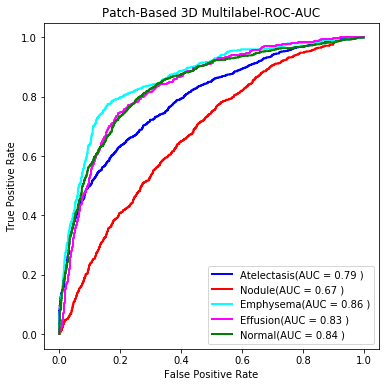

In [177]:
plot_multi_label_auc("D:/Science/WinSCP/predict_BCL_tara_epoch_20_without_rglz.csv",True,"F:/MasterThesis/mastertheisComparison/Multi_Label_CLf_results/Lungs/Lung_WBCL_Without_regulizer_epoch_20.png","Patch-Based 3D Multilabel-ROC-AUC")

In [174]:
Patient_lvl_prediction_csv("D:/Science/WinSCP/predict_BCL_tara_epoch_20_without_rglz.csv","F:/MasterThesis/mastertheisComparison/Multi_Label_CLf_results/Lungs/Patient_Lvl_pred_Lung_WBCL_Without_regulizer_epoch_20.csv")

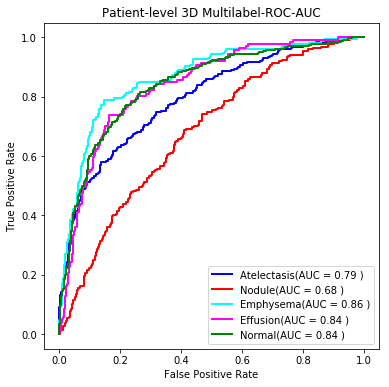

In [178]:
plot_multi_label_auc("F:/MasterThesis/mastertheisComparison/Multi_Label_CLf_results/Lungs/Patient_Lvl_pred_Lung_WBCL_Without_regulizer_epoch_20.csv",True,"F:/MasterThesis/mastertheisComparison/Multi_Label_CLf_results/Lungs/Patient_Lvl_pred_Lung_WBCL_Without_regulizer_epoch_20.png","Patient-level 3D Multilabel-ROC-AUC")